In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
from_pickle = pd.read_pickle('Us_equity_px_1D.pkl')

In [3]:
stock_px = from_pickle['Adj Close']
stock_px 

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.161701,31.963156,37.750088,68.699387,NaN,62.953072,26.190001,129.528763,224.570007,77.463676,...,138.614258,17.055882,98.654648,40.987183,52.611282,62.058739,82.342461,95.228378,156.240005,81.050728
2019-01-03,60.834835,29.581665,33.989902,66.435837,NaN,59.982040,25.780001,125.106384,215.699997,72.784462,...,135.706390,17.634182,97.700241,40.825676,51.803505,59.931320,80.271294,93.505928,146.880005,78.249268
2019-01-04,62.940540,31.530161,35.440907,68.576202,NaN,61.694008,26.389999,129.970978,226.190002,74.551567,...,139.373642,18.236244,101.640762,41.225174,53.713482,62.459980,82.360458,96.699471,152.970001,81.319389
2019-01-07,64.277046,32.425678,35.362019,69.577072,NaN,62.617920,26.330000,130.422440,229.259995,75.020393,...,140.401566,18.600657,103.445648,41.046673,53.992802,61.536205,82.270409,96.736702,155.289993,81.808670
2019-01-08,65.219330,31.904114,36.036121,69.900452,NaN,61.866112,26.430000,133.720779,232.679993,76.850571,...,141.299866,18.711561,106.686874,41.522678,54.385376,62.114723,82.108322,94.567337,156.330002,83.027115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,140.490005,10.210000,227.179993,197.440002,115.709999,112.699997,109.489998,336.779999,559.440002,225.610001,...,285.399994,30.876129,77.239998,61.459999,118.809998,135.888855,134.279999,114.629997,347.690002,181.559998
2024-08-27,141.100006,10.170000,228.029999,195.919998,116.739998,113.099998,110.680000,340.380005,567.820007,231.839996,...,288.040009,30.399279,77.040001,60.889999,117.680000,135.061066,134.500000,114.669998,346.040009,182.100006
2024-08-28,141.059998,10.150000,226.490005,195.399994,117.529999,112.900002,111.010002,337.390015,560.539978,227.169998,...,289.470001,30.439014,75.300003,60.680000,116.519997,135.460007,135.649994,114.190002,343.829987,182.910004


In [4]:
# Calculate the total number of data points
total_data_points = len(stock_px)

# Calculate the number of non-NA/null entries for each coin
non_null_counts = stock_px.notnull().sum()

# Calculate the threshold for 90% of the data points
threshold = 0.90 * total_data_points

# Filter out columns with fewer than 90% of data points
stock_px = stock_px.loc[:, non_null_counts >= threshold]

stock_px

Ticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.161701,31.963156,37.750088,68.699387,62.953072,26.190001,129.528763,224.570007,77.463676,34.914421,...,138.614258,17.055882,98.654648,40.987183,52.611282,62.058739,82.342461,95.228378,156.240005,81.050728
2019-01-03,60.834835,29.581665,33.989902,66.435837,59.982040,25.780001,125.106384,215.699997,72.784462,34.760963,...,135.706390,17.634182,97.700241,40.825676,51.803505,59.931320,80.271294,93.505928,146.880005,78.249268
2019-01-04,62.940540,31.530161,35.440907,68.576202,61.694008,26.389999,129.970978,226.190002,74.551567,35.562405,...,139.373642,18.236244,101.640762,41.225174,53.713482,62.459980,82.360458,96.699471,152.970001,81.319389
2019-01-07,64.277046,32.425678,35.362019,69.577072,62.617920,26.330000,130.422440,229.259995,75.020393,35.741451,...,140.401566,18.600657,103.445648,41.046673,53.992802,61.536205,82.270409,96.736702,155.289993,81.808670
2019-01-08,65.219330,31.904114,36.036121,69.900452,61.866112,26.430000,133.720779,232.679993,76.850571,36.406487,...,141.299866,18.711561,106.686874,41.522678,54.385376,62.114723,82.108322,94.567337,156.330002,83.027115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,140.490005,10.210000,227.179993,197.440002,112.699997,109.489998,336.779999,559.440002,225.610001,60.740002,...,285.399994,30.876129,77.239998,61.459999,118.809998,135.888855,134.279999,114.629997,347.690002,181.559998
2024-08-27,141.100006,10.170000,228.029999,195.919998,113.099998,110.680000,340.380005,567.820007,231.839996,60.560001,...,288.040009,30.399279,77.040001,60.889999,117.680000,135.061066,134.500000,114.669998,346.040009,182.100006
2024-08-28,141.059998,10.150000,226.490005,195.399994,112.900002,111.010002,337.390015,560.539978,227.169998,60.959999,...,289.470001,30.439014,75.300003,60.680000,116.519997,135.460007,135.649994,114.190002,343.829987,182.910004


In [5]:
stock_ret = stock_px / stock_px.shift() - 1
stock_ret

Ticker,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,-0.004395,...,-0.020978,0.033906,-0.009674,-0.003940,-0.015354,-0.034281,-0.025153,-0.018088,-0.059908,-0.034564
2019-01-04,0.034613,0.065868,0.042689,0.032217,0.028541,0.023662,0.038884,0.048632,0.024279,0.023056,...,0.027023,0.034142,0.040333,0.009785,0.036870,0.042193,0.026026,0.034153,0.041462,0.039235
2019-01-07,0.021234,0.028402,-0.002226,0.014595,0.014976,-0.002274,0.003474,0.013573,0.006289,0.005035,...,0.007375,0.019983,0.017758,-0.004330,0.005200,-0.014790,-0.001093,0.000385,0.015166,0.006017
2019-01-08,0.014660,-0.016085,0.019063,0.004648,-0.012006,0.003798,0.025290,0.014918,0.024396,0.018607,...,0.006398,0.005962,0.031333,0.011597,0.007271,0.009401,-0.001970,-0.022425,0.006697,0.014894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,-0.002697,-0.017324,0.001499,-0.000557,0.000089,0.004311,0.010532,0.002042,-0.012172,0.003967,...,0.013998,-0.008929,-0.001680,0.022289,0.021406,-0.004893,-0.004206,-0.003651,-0.011177,0.003648
2024-08-27,0.004342,-0.003918,0.003742,-0.007699,0.003549,0.010869,0.010689,0.014979,0.027614,-0.002963,...,0.009250,-0.015444,-0.002589,-0.009274,-0.009511,-0.006092,0.001638,0.000349,-0.004746,0.002974
2024-08-28,-0.000284,-0.001967,-0.006753,-0.002654,-0.001768,0.002982,-0.008784,-0.012821,-0.020143,0.006605,...,0.004965,0.001307,-0.022586,-0.003449,-0.009857,0.002954,0.008550,-0.004186,-0.006387,0.004448


In [6]:
end_of_insample = pd.Timestamp('2021-12-31')

In [7]:
def compute_turnover(port):
    to = (port.fillna(0)-port.shift().fillna(0)).abs().sum(1)   
    return to

In [8]:
def compute_sharpe_ratio(rets):
    mean_rets = rets.mean()*252
    vol = rets.std()*np.sqrt(252)
    sharpe_ratio = mean_rets / vol
    return sharpe_ratio

In [9]:
def compute_stats(rets):
    stats={}
    stats['avg'] = rets.mean()*252
    stats['vol'] = rets.std()*np.sqrt(252)
    stats['sharpe'] = stats['avg']/stats['vol']
    stats['hit_rate'] = rets[rets>0].count() / rets.count()
    stats = pd.DataFrame(stats)
    return stats

In [10]:
def drawdown(px):
    return (px / (px.expanding(min_periods=1).max()) - 1)

In [11]:
def duration(px):
    peak = px.expanding(min_periods=1).max()
    res = pd.DataFrame(index=px.index,columns=px.columns)
    for col in px.columns:
        for dt in px.index:
            if px.loc[dt,col] >= peak.loc[dt,col]:
                 res.loc[dt,col] = 0
            else: 
                res.loc[dt,col] = res.loc[:dt,col].iloc[-2] + 1
    return res

Trading Range Breakout 

In [12]:
def gen_buy_signal(ret, n, p):
    # Calculate the local maximum (resistance level) over the last n days
    R_max = ret.rolling(window=n, min_periods=1).max().shift(1)

    # Generate buy signals when the price breaks above the resistance level plus a percentage band
    buy_signals = (ret > R_max * (1 + p)).astype(int)

    return buy_signals

In [13]:
def gen_sell_signal(ret, n, p):
    # Calculate the local minimum (support level) over the last n days
    S_min = ret.rolling(window=n, min_periods=1).min().shift(1)

    # Generate sell signals when the price breaks below the support level minus a percentage band
    sell_signals = (ret < S_min * (1 - p)).astype(int) * -1

    return sell_signals

In [14]:
def gen_port(buy_signals, sell_signals, mode='combine'):
    if mode == 'buy':
        signals = buy_signals
    elif mode == 'sell':
        signals = sell_signals
    elif mode == 'combine':
        signals = buy_signals + sell_signals
    else:
        raise ValueError("Mode should be 'buy', 'sell', or 'combine'.")

    # Normalize the portfolio weights to be fully invested
    port = signals.div(signals.abs().sum(axis=1), axis=0)

    return port

In [15]:
# Define the parameters for grid search
bands = [0, 0.01, 0.05, 0.1]
windows = [50, 100, 150, 200]

# Initialize dictionaries to store results for each metric
metrics = {
    'Sharpe Ratio': pd.DataFrame(index=bands, columns=windows),
    'Return': pd.DataFrame(index=bands, columns=windows),
    'Volatility': pd.DataFrame(index=bands, columns=windows),
    'Holding Period': pd.DataFrame(index=bands, columns=windows),
    'Turnover': pd.DataFrame(index=bands, columns=windows),
    'Transaction Costs': pd.DataFrame(index=bands, columns=windows),
}

# Define transaction costs (in basis points)
tcost_bps = 20

# Loop over each combination of band percentage and window size
for p in bands:
    for n in windows:
        # Generate buy and sell signals
        buy_signals = gen_buy_signal(stock_ret, n, p)
        sell_signals = gen_sell_signal(stock_ret, n, p)
        
        # Generate portfolio based on signals
        port = gen_port(buy_signals, sell_signals)
        
        # Calculate gross returns from the strategy
        strat_gross_ret = (port.shift() * stock_ret).sum(axis=1)
        
        # Calculate turnover
        to = compute_turnover(port)
        
        # Calculate net returns after accounting for transaction costs
        strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        
        # In-sample returns (adjust `end_of_insample` as per your data)
        in_sample_ret = strat_net_ret.loc[:end_of_insample]
        
        # Compute metrics
        sharpe_ratio = compute_sharpe_ratio(in_sample_ret)
        avg_return = in_sample_ret.mean() * 252 
        volatility = in_sample_ret.std() * np.sqrt(252)  
        holding_period = (2 / to.mean())  # Approximate holding period
        total_tcost = (to * tcost_bps * 1e-4).sum()

        # Store metrics in the corresponding DataFrames
        metrics['Sharpe Ratio'].loc[p, n] = sharpe_ratio
        metrics['Return'].loc[p, n] = avg_return
        metrics['Volatility'].loc[p, n] = volatility
        metrics['Holding Period'].loc[p, n] = holding_period
        metrics['Turnover'].loc[p, n] = to.mean()
        metrics['Transaction Costs'].loc[p, n] = total_tcost.mean()

In [16]:
print(metrics['Sharpe Ratio'])

           50        100       150       200
0.00 -3.167234 -1.937135 -1.697574 -1.322748
0.01 -3.187908 -1.989278 -1.691941 -1.304169
0.05 -2.940273 -2.049572 -1.781051  -1.55268
0.10 -3.096072 -2.202285 -1.742803 -1.326445


In [17]:
# print(metrics['Holding Period'])

Channel Range Breakout

In [18]:
stock_high = from_pickle['High']
stock_low = from_pickle['Low']

stock_high_pct = stock_high / stock_high.shift() - 1
stock_low_pct = stock_low / stock_low.shift() - 1

In [19]:
def CBR_long_signals(ret, X, Y): 
    port = pd.DataFrame(np.nan, index=ret.index, columns=ret.columns)

    # Buy signal: Price breaks above the maximum high of the past Y days
    buy_signals = (ret >= ret.rolling(window=Y).max().shift(1)).astype(int)
    # Sell signal: Price drops below the minimum low of the past X days
    exit_signals = (ret <= ret.rolling(window=X).min().shift(1)).astype(int)

    port[buy_signals == 1] = 1
    port[exit_signals == 1] = 0
    
    # Carry forward the last position until a sell signal is triggered
    port = port.ffill().fillna(0)
    
    return port

In [20]:
def CBR_short_signals(ret, M, N): 
    port = pd.DataFrame(np.nan, index=ret.index, columns=ret.columns)

    # Short signal: Price drops below the minimum low of the past M days
    short_signals = (ret <= ret.rolling(window=M).min().shift(1)).astype(int)
    # Cover signal: Price rises above the maximum high of the past N days
    cover_signals = (ret >= ret.rolling(window=N).max().shift(1)).astype(int)

    port[short_signals == 1] = -1
    port[cover_signals == 1] = 0
    
    # Carry forward the last position until a cover signal is triggered
    port = port.ffill().fillna(0)
    
    return port

In [21]:
# def CBR_port(buy_signals, sell_signals, mode='combine'):
#     if mode == 'buy':
#         signals = buy_signals
#     elif mode == 'sell':
#         signals = sell_signals
#     elif mode == 'combine':
#         signals = buy_signals + sell_signals
#     else:
#         raise ValueError("Mode should be 'buy', 'sell', or 'combine'.")

#     # Normalize the portfolio weights to be fully invested
#     port = signals.div(signals.abs().sum(axis=1), axis=0)

#     return port

In [22]:
X_values = range(1, 100, 3)
Y_values = range(1, 100, 3)

metrics_long = {
    'Sharpe Ratio': pd.DataFrame(index=X_values, columns=Y_values),
    'Return': pd.DataFrame(index=X_values, columns=Y_values),
    'Volatility': pd.DataFrame(index=X_values, columns=Y_values),
    'Holding Period': pd.DataFrame(index=X_values, columns=Y_values),
    'Turnover': pd.DataFrame(index=X_values, columns=Y_values),
    'Transaction Costs': pd.DataFrame(index=X_values, columns=Y_values),
}

# Define transaction costs (in basis points)
tcost_bps = 20

for Y in Y_values:
    for X in X_values:
        if X > Y:
            continue  
        port = CBR_long_signals(stock_ret, X, Y)
        port = port.div(port.abs().sum(axis=1), axis=0)
        strat_gross_ret = (port.shift() * stock_ret).sum(axis=1)
        
        # Calculate turnover
        to = compute_turnover(port)
        
        # Calculate net returns after accounting for transaction costs
        strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        
        # In-sample returns (adjust `end_of_insample` as per your data)
        in_sample_ret = strat_net_ret.loc[:end_of_insample]
        
        # Compute metrics
        sharpe_ratio = compute_sharpe_ratio(in_sample_ret)
        avg_return = in_sample_ret.mean() * 252
        volatility = in_sample_ret.std() * np.sqrt(252)
        holding_period = (2 / to.mean())  # Approximate holding period
        total_tcost = (to * tcost_bps * 1e-4).sum()

        # Store metrics in the corresponding DataFrames
        metrics_long['Sharpe Ratio'].loc[X, Y] = sharpe_ratio
        metrics_long['Return'].loc[X, Y] = avg_return
        metrics_long['Volatility'].loc[X, Y] = volatility
        metrics_long['Holding Period'].loc[X, Y] = holding_period
        metrics_long['Turnover'].loc[X, Y] = to.mean()
        metrics_long['Transaction Costs'].loc[X, Y] = total_tcost.mean()

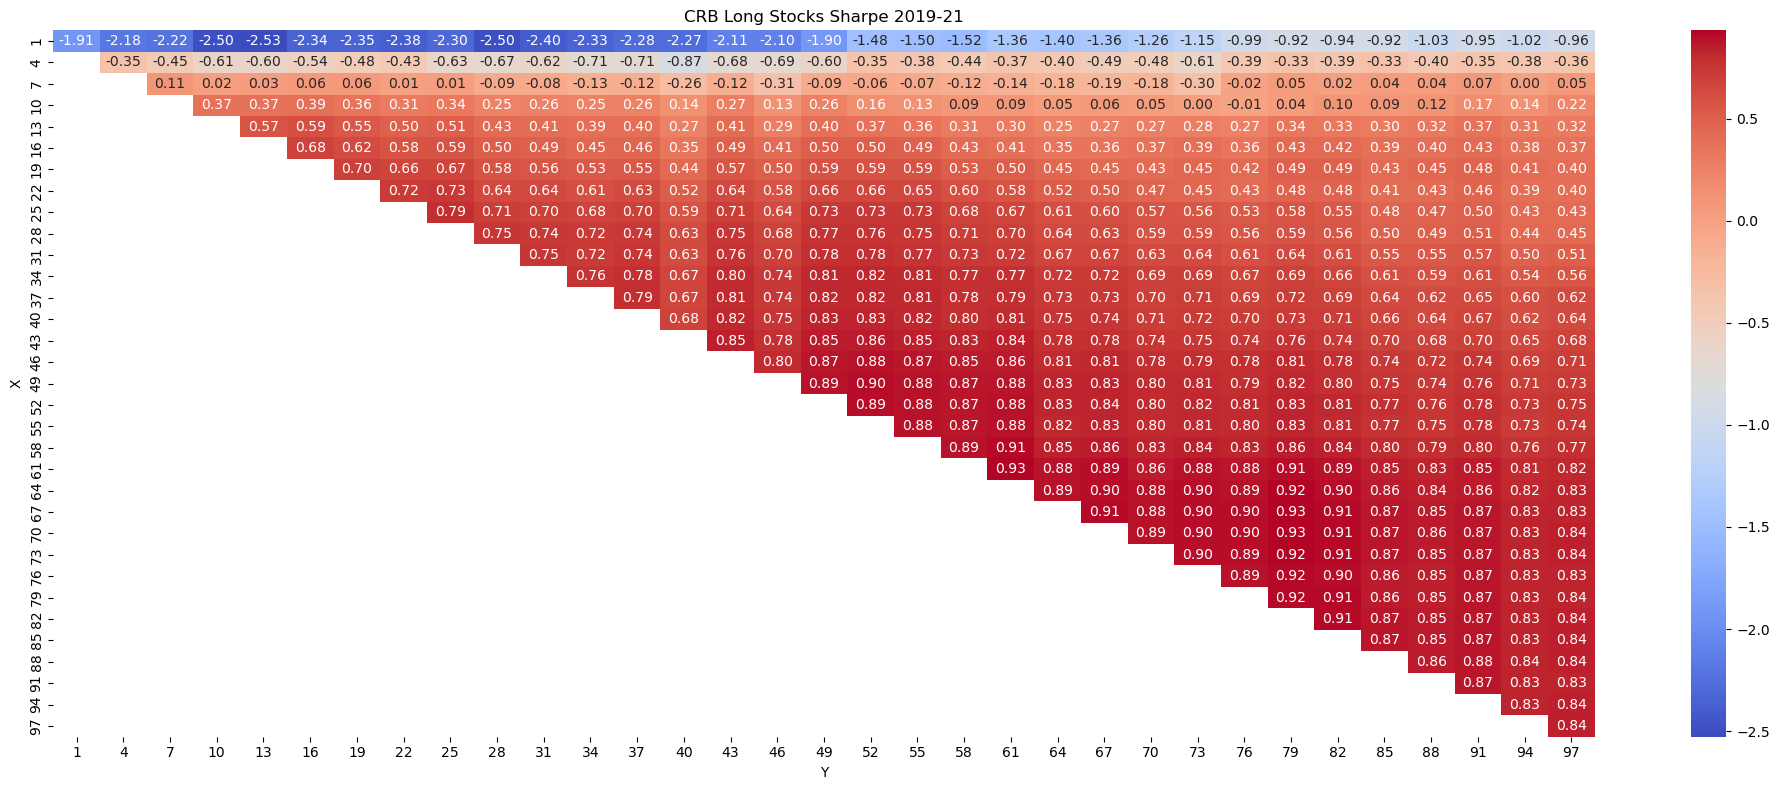

In [23]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(metrics_long['Sharpe Ratio'].astype(float), annot=True, cmap="coolwarm", fmt=".2f")
# Set labels and title
plt.title('CRB Long Stocks Sharpe 2019-21')
plt.xlabel('Y')
plt.ylabel('X')
# Show the plot
plt.tight_layout()
plt.show()

In [24]:
# Define the ranges for M and N
M_values = range(1, 100, 3)
N_values = range(1, 100, 3)

metrics_short = {
    'Sharpe Ratio': pd.DataFrame(index=M_values, columns=N_values),
    'Return': pd.DataFrame(index=M_values, columns=N_values),
    'Volatility': pd.DataFrame(index=M_values, columns=N_values),
    'Holding Period': pd.DataFrame(index=M_values, columns=N_values),
    'Turnover': pd.DataFrame(index=M_values, columns=N_values),
    'Transaction Costs': pd.DataFrame(index=M_values, columns=N_values),
}

# Define transaction costs (in basis points)
tcost_bps = 20

for M in M_values:
    for N in N_values:
        if M > N:
            continue 
        # Generate short signals
        port = CBR_short_signals(stock_ret, M, N)
        port = port.div(port.abs().sum(axis=1), axis=0)
        strat_gross_ret = (port.shift() * stock_ret).sum(axis=1)
        
        # Calculate turnover
        to = compute_turnover(port)
        
        # Calculate net returns after accounting for transaction costs
        strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        
        # In-sample returns (adjust `end_of_insample` as per your data)
        in_sample_ret = strat_net_ret.loc[:end_of_insample]
        
        # Compute metrics
        sharpe_ratio = compute_sharpe_ratio(in_sample_ret)
        avg_return = in_sample_ret.mean() * 252
        volatility = in_sample_ret.std() * np.sqrt(252)
        holding_period = (2 / to.mean())  # Approximate holding period
        total_tcost = (to * tcost_bps * 1e-4).sum()

        # Store metrics in the corresponding DataFrames
        metrics_short['Sharpe Ratio'].loc[M, N] = sharpe_ratio
        metrics_short['Return'].loc[M, N] = avg_return
        metrics_short['Volatility'].loc[M, N] = volatility
        metrics_short['Holding Period'].loc[M, N] = holding_period
        metrics_short['Turnover'].loc[M, N] = to.mean()
        metrics_short['Transaction Costs'].loc[M, N] = total_tcost.mean()

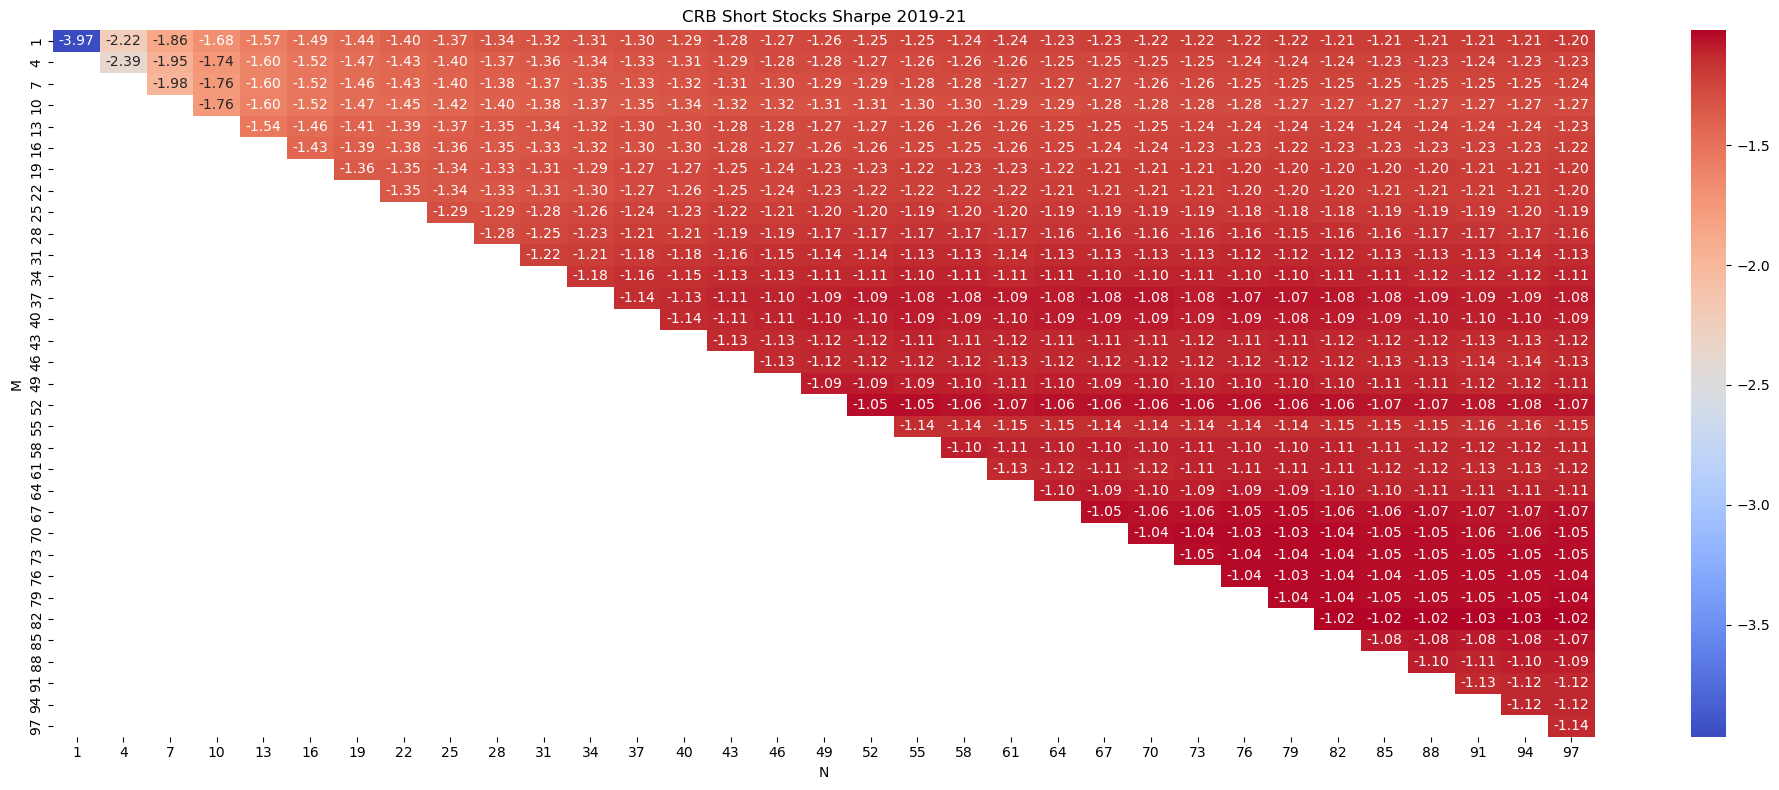

In [25]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(metrics_short['Sharpe Ratio'].astype(float), annot=True, cmap="coolwarm", fmt=".2f")
# Set labels and title
plt.title('CRB Short Stocks Sharpe 2019-21')
plt.xlabel('N')
plt.ylabel('M')
# Show the plot
plt.tight_layout()
plt.show()

full-sample test long side of the strategy

In [26]:
# def plot_buy_signals(price_data, ret, X, Y):
#     # Generate buy signals using the CBR_long_signals function
#     port = CBR_long_signals(ret, X, Y)

#     # Identify the buy signals
#     buy_signals = (port.diff() > 0).astype(int)
#     buy_dates = buy_signals[buy_signals == 1].dropna().index

#     # Plot the price data
#     plt.figure(figsize=(14, 8))
#     plt.plot(price_data.index, price_data, label='Price', color='blue', lw=2)
    
#     # Mark the buy signals on the chart
#     plt.plot(buy_dates, price_data.loc[buy_dates], '^', markersize=10, color='green', lw=0, label='Buy Signal')

#     # Title and labels
#     plt.title(f'Buy Signals for CBR Strategy (X={X}, Y={Y})')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [27]:
port = CBR_long_signals(stock_ret, 60, 60)
port = port.div(port.abs().sum(axis=1), axis=0)
strat_gross_ret = (port.shift() * stock_ret).sum(axis=1)

 # Calculate turnover
to = compute_turnover(port)
        
# Calculate net returns after accounting for transaction costs
strat_net_ret = strat_gross_ret.subtract(to * tcost_bps * 1e-4, fill_value=0)
        
full_sample_sr = compute_sharpe_ratio(strat_net_ret)

# Print the Sharpe Ratio and Turnover using f-string
print(f"Sharpe Ratio: {full_sample_sr :.3f}")
print(f"Holding period: {2/to.mean():.3f}")

Sharpe Ratio: 0.703
Holding period: 29.277


<Axes: xlabel='Date'>

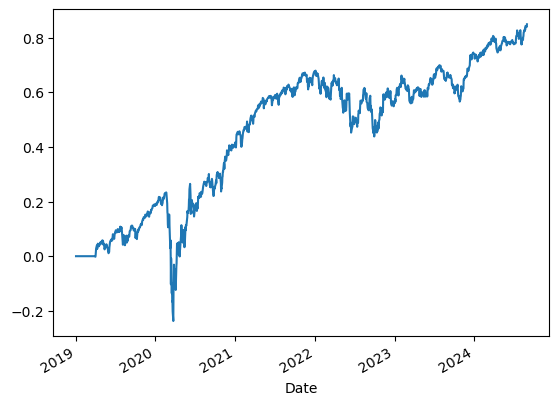

In [28]:
strat_net_ret.cumsum().plot()

In [29]:
# Define the S&P 500 index ticker symbol
sp500_ticker = "^GSPC"

# Download historical data for the S&P 500
sp500_px = yf.download(sp500_ticker, start="2019-01-01")

[*********************100%%**********************]  1 of 1 completed


In [30]:
sp500_ret = sp500_px['Adj Close'] / sp500_px['Adj Close'].shift() - 1

In [31]:
full_sample_ret = pd.DataFrame({
    'strat_ret': strat_net_ret,
    'sp500_ret': sp500_ret
})

full_sample_stats = compute_stats(full_sample_ret)
print(full_sample_stats)

                avg       vol    sharpe  hit_rate
strat_ret  0.150144  0.213592  0.702946  0.526648
sp500_ret  0.164556  0.204864  0.803246  0.545965
